# request 패키지

In [1]:
import requests

response = requests.get('https://www.naver.com')
print(response.status_code)

200



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
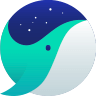
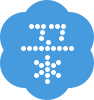

In [2]:
print(response.text)

## 로봇이 아님을 나타내기 위해서 user-agent라는 값을 header에 넣어 보냄
- 직접적인 url 주소로 요청 시 웹 사이트에서 웹 크롤링을 통해 접근한 것을 감지하고 접속을 차단하게 됨
- user-agnet 헤더 값을 포함하여 요청하면 브라우저를 통해 요청하는 것으로 인식되어 해결

In [24]:
URL = 'https://www.google.com/search'
params = {'q':'오승재'}
header = {'user-agent': 
          'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
response = requests.get(URL,params=params)#,headers=header
response.raise_for_status() #응답코드가 200이 아니면 오류내고 멈춤

print('상태코드: ',response.status_code)

result = response.text

with open('mygoogle2.html','w', encoding='utf-8') as f:
    f.write(result)

print('저장 완료!')

상태코드:  200
저장 완료!


## [실습] 네이버 실시간 인기 검색어 추출

In [3]:
import requests

In [13]:
URL = 'https://datalab.naver.com'
response = requests.get(URL)
html_text = response.text

temp = html_text.split('<em class="num">1</em>')[1]
temp = temp.split('<span class="title">')[1]
temp = temp.split('</span>')[0]
print(temp)

반티


# BeautifulSoup 패키지

## Parser별 출력 결과 비교

In [6]:
# !pip install html5lib
# !pip install lxml

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup('<a></p>', 'html.parser')
print('html.parser')
print(soup)
print('-'*40)

soup = BeautifulSoup('<a></p>', 'lxml')
print('lxml')
print(soup)
print('-'*40)

soup = BeautifulSoup('<a></p>', 'xml')
print('xml')
print(soup)
print('-'*40)

soup = BeautifulSoup('<a></p>', 'html5lib')
print('html5lib')
print(soup)
print('-'*30)

html.parser
<a></a>
----------------------------------------
lxml
<html><body><a></a></body></html>
----------------------------------------
xml
<?xml version="1.0" encoding="utf-8"?>
<a/>
----------------------------------------
html5lib
<html><head></head><body><a><p></p></a></body></html>
------------------------------


## 기본 사용법

In [8]:
import requests
from bs4 import BeautifulSoup

URL =  'https://ko.wikipedia.org/wiki/%EC%9B%B9_%ED%81%AC%EB%A1%A4%EB%9F%AC'
res = requests.get(URL)

soup = BeautifulSoup(res.text, 'html.parser')

# 태그를 이용한 접근
print(soup.title)
print(soup.footer.ul.li.text)

# 태그와 속성을 이용한 접근 ['']
# print(soup.a['id']) # 만약 속성이 존재하지 않으면 에러 발생

# 함수를 이용한 태그 내의 다양한 속성을 이용한 접근
print(soup.find('a', attrs={'title':'구글봇'}))
print(soup.find(attrs={'title':'구글봇'})) # title 속성 값이 '구글봇'인 어떤 element를 찾아 

<title>웹 크롤러 - 위키백과, 우리 모두의 백과사전</title>
 이 문서는 2023년 4월 30일 (일) 18:34에 마지막으로 편집되었습니다.
<a href="/wiki/%EA%B5%AC%EA%B8%80%EB%B4%87" title="구글봇">구글봇</a>
<a href="/wiki/%EA%B5%AC%EA%B8%80%EB%B4%87" title="구글봇">구글봇</a>


## 검색: 태그

In [15]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.naver.com')
soup = BeautifulSoup(res.text, 'html.parser')

print(soup.title)
print(soup.title.name) # 태그의 이름
print(soup.title.text) # 태그 내의 모든 문자열 
print(soup.title.string) # 태그 내의 문자열(태그 안에 또 다른 태그가 없을 때?)


print(soup.img)
print(soup.img['src']) # 이미지 태그의 src 속성 값

<title>NAVER</title>
title
NAVER
NAVER
<img alt="한국경제TV" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/215.png"/>
https://s.pstatic.net/static/newsstand/2020/logo/light/0604/215.png


## 검색: find()

In [10]:
print(soup.find('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


## 검색: find_all()

In [11]:
result = soup.find_all('a', limit=2) # limit: 제일 먼저 검색되는 태그 정보 개수
print(len(result))

2


In [12]:
result = soup.find_all('span', attrs={'class':'blind'})
print(len(result))
print(result[0])

111
<span class="blind">네이버</span>


## [실습] 네이버 메인 페이지의 언론사 목록 가져오기

In [13]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.naver.com')
soup = BeautifulSoup(res.text, 'html.parser')

result = soup.find_all('a', attrs={'class':'thumb'})

for r in result:
#     print(r.img['alt'])
    print(r.find('img')['alt'])

OSEN
MBN
중앙데일리
한국일보
마이데일리
동아일보
서울신문
노컷뉴스
스포츠조선
뉴스타파
뉴시스
지디넷코리아
한겨레
매일경제
YTN
광주일보
전남일보
광주드림
동아사이언스
프라임경제
한경잡앤조이
한국농어촌방송
TBS
법률신문


## 검색: select_one(), select()
- find(), find_all()과 동일
- 얘는 CSS 선택자로 해당 element 검색

In [14]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.naver.com/')
soup = BeautifulSoup(res.text, 'html.parser')

print(soup.select_one('div > a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [15]:
print(soup.select_one('#NM_NEWSSTAND_TITLE > a'))

<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>


## 텍스트 가져오기: get_text() / text 필드
- 검색 결과에서 태그를 제외한 텍스트만 출력

In [16]:
text = soup.find('a', attrs={'data-clk':'squ.dust'})
print(text)
# print(text.get_text())
print(text.text) # 위랑 같은 결과

<a class="air_area" data-clk="squ.dust" href="https://weather.naver.com/today/05200109?cpName=KMA">
<ul class="list_air">
<li class="air_item">미세<strong class="state state_normal">보통</strong></li>
<li class="air_item">초미세<strong class="state state_normal">보통</strong></li>
</ul>
<span class="location">우산동</span>
</a>


미세보통
초미세보통

우산동



## 텍스트 가져오기: string
- 검색 결과에서 태그 안에 또 다른 태그가 없는 경우 해당 내용을 출력

In [17]:
print(text)
# print(text.string) # a 태그 외 서브 태그가 있어 None
print(text.span.string)

<a class="air_area" data-clk="squ.dust" href="https://weather.naver.com/today/05200109?cpName=KMA">
<ul class="list_air">
<li class="air_item">미세<strong class="state state_normal">보통</strong></li>
<li class="air_item">초미세<strong class="state state_normal">보통</strong></li>
</ul>
<span class="location">우산동</span>
</a>
우산동


## [실습] 네이버에서 웹툰 제목 가져오기

In [18]:
import requests
from bs4 import BeautifulSoup

URL = 'https://news.naver.com/main/ranking/popularDay.naver'
header = {'user-agent': 
          'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
res = requests.get(URL, headers=header)
res.raise_for_status()
soup = BeautifulSoup(res.text, 'html.parser')

news_list = soup.find_all('div', attrs={'class':'rankingnews_box'})
# print(news_list)
# print(news_list[0].a.strong.text)

for news in news_list:
    press_title = news.a.strong.text
    if '경제' in press_title:
        print('언론사: ', press_title)
        top_5 = news.find_all('div', attrs={'class':'list_content'})
        for i, rankingnews in enumerate(top_5, 1):
            print(f'{i:2d}: {rankingnews.a.text}')
        print()

언론사:  한국경제
 1: '싸구려'라고 무시했는데…중국에 허 찔린 한국 배터리
 2: "맥주 한 잔 할까?" 3000명 우르르…'핫플' 떠오른 이곳 [현장+]
 3: 바닷속 원룸서 74일 버틴 교수…'세월호 잠수팀'으로 왔었다
 4: '에루샤' 매출 4조 육박하더니…잠수교 이어 경복궁서 패션쇼 [오정민의 유통한입]
 5: 당첨만 되면 10억 번다…과천 '줍줍'에 1만4000명 우르르

언론사:  매일경제
 1: “거대한 이빨 보자마자 직감했다”…고래 잡아 먹는 20m 괴생명체
 2: “우리 회사 에이스가 떠났어요”…대기업서 쓰는 기술이 어쩐지
 3: 너무 야했나...화사, 대학축제 퍼포먼스 선정성 논란
 4: “일본여행 더 가겠네”…돌연 급락한 항공권, 왕복에 단돈 10만원
 5: “우리 아이 자꾸 살찌던데”…초·중학교서 초코 우유 못 보나

언론사:  서울경제
 1: "얼마나 셌기에" 화사 대학축제서 '또' 외설 논란…직캠 공개되자 일파만파
 2: 대낮 손님도 있는데…'양심 손님' 그 가게서 남녀 3명이 벌인 짓
 3: 라방 한번에 1억 번 '김연아 닮은 꼴' 유치원 교사 곧바로 '퇴사'
 4: “스승의 날 ‘인간 카네이션’ 너무 싫어요”…전 보육교사 호소
 5: '득표율 1위' 에르도안, 결선으로…예상밖 선전에 증시 6% 폭락[뒷북 글로벌]

언론사:  헤럴드경제
 1: 없어서 못팔던 효리차, 중고가 ‘뚝’…왜 떨어졌을까? [여車저車]
 2: 인터넷방송 1회로 9600만원…‘10년치 연봉’번 中여교사, 일 관뒀다
 3: “재택 근무 없애더니, 이젠 집으로 가라네요” 믿었던 유명 회사의 배신
 4: “연진아, 나 지금 되게 신나” 영어론 뭐야? 이거 번역하려고 애플 그만뒀다
 5: "스승의날 선물로 '인간 카네이션? 예쁜 쓰레기" 전직 보육교사 글 논란

언론사:  아시아경제
 1: '라방' 한 번으로 10년치 월급 벌더니…바로 사표 던진 中유치원 교사
 2: "7만원 내기 했어요" 하남서 에버랜드까지 11시간 걸어간 중학생들
 3: 청계천 걷는 이명박, 

## [실습] 다음 영화정보 사이트에서 포스터 스크래핑 하기

In [19]:
import requests
from bs4 import BeautifulSoup

URL = 'https://movie.daum.net/ranking/reservation'
res = requests.get(URL)
res.raise_for_status()

soup = BeautifulSoup(res.text, 'lxml')
poster_img = soup.find_all('img', attrs={'class':'img_thumb'})
img_url = poster_img[0].get('src')
# print(img_url)

res = requests.get(img_url)
with open('poster.jpg', 'wb') as f:
    f.write(res.content)
    
print('저장완료')

저장완료


In [20]:
import requests
from bs4 import BeautifulSoup

URL = 'https://movie.daum.net/ranking/reservation'
res = requests.get(URL)
res.raise_for_status()

soup = BeautifulSoup(res.text, 'lxml')
poster_img = soup.find_all('img', attrs={'class':'img_thumb'})

for img in poster_img:
    img_url = img.get('src')
    img_name = img['alt'] + '.jpg'
    if ':' in img_name:
        img_name = img_name.replace(':', '')
    res = requests.get(img_url)
    with open('poster_img\\' + img_name, 'wb') as f:
        f.write(res.content)
#         print(img_name)
    
print('저장완료')

분노의 질주 라이드 오어 다이.jpg
가디언즈 오브 갤럭시 Volume 3.jpg
범죄도시3.jpg
문재인입니다.jpg
스즈메의 문단속.jpg
슈퍼 마리오 브라더스.jpg
슬픔의 삼각형.jpg
극장판 짱구는 못말려 동물소환 닌자 배꼽수비대.jpg
유랑지구2.jpg
드림.jpg
롱디.jpg
존 윅 4.jpg
메리 마이 데드 바디.jpg
남은 인생 10년.jpg
아기공룡 둘리  얼음별 대모험 리마스터링.jpg
드림팰리스.jpg
옥수역귀신.jpg
거울 속 외딴 성.jpg
토리와 로키타.jpg
조제, 호랑이 그리고 물고기들.jpg
저장완료


In [21]:
# t
import os
import requests
from bs4 import BeautifulSoup

URL = 'https://movie.daum.net/ranking/reservation'
res = requests.get(URL)
res.raise_for_status()

soup = BeautifulSoup(res.text, 'lxml')
poster_img = soup.find_all('img', attrs={'class':'img_thumb'})

img_dir = './poster_img/'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
    print('폴더 생성 완료')
else:
    print('폴더가 존재함')

for i, movie in enumerate(poster_img, 1):
    title = movie.get('alt')
    img_url = movie.get('src')
    if ':' in title:
        title = title.replace(':','')
    img_res = requests.get(img_url)
    with open(f'{img_dir}{i:2d}_{title}.jpg', 'wb') as f:
        f.write(img_res.content)
#         print(f'{title}')
        
print('저장완료')

폴더가 존재함
분노의 질주 라이드 오어 다이
가디언즈 오브 갤럭시 Volume 3
범죄도시3
문재인입니다
스즈메의 문단속
슈퍼 마리오 브라더스
슬픔의 삼각형
극장판 짱구는 못말려 동물소환 닌자 배꼽수비대
유랑지구2
드림
롱디
존 윅 4
메리 마이 데드 바디
남은 인생 10년
아기공룡 둘리  얼음별 대모험 리마스터링
드림팰리스
옥수역귀신
거울 속 외딴 성
토리와 로키타
조제, 호랑이 그리고 물고기들
저장완료
